# Homework assignment 3
Return this notebook (filled with your answers) by the deadline via mycourses.  Also provide pdf printout of the notebook.

Note that the notebook that you submit needs to work, that is, if running it produces errors, then that may result in reduction of points.

The first two questions related to lecture notes by Prof. Ollila and the last two questions to lecture notes by Prof. Vorobyov. 

_My name_: Nguyen Xuan Binh <br>
_My student number_: 887799

In [83]:
import pandas as pd
from sklearn import linear_model as LM

In [84]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
# I need this "time" library to stop the code for debugging purposes. Nothing related to this assignment
import time
# This library is for displaying images
from IPython.display import Image, display

***

##  Question 1: look at the data (basic operations)  
Load the data in _prostate.txt_ to your workspace. You can consult the file _prostate.info.txt_ for description of  the data set. 

In [85]:
data_table = pd.read_csv('prostate.txt', sep='\t')
predictors=list(data_table.columns[1:-2])
data_table

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


### 1 a)
Make a scatterplot matrix of the prostate cancer variables,  where the first row shows the response against each of the predictors in turn. <br>
_Hint_: you should get the same picture that  is displayed in Figure 1.1., page 3,  of  Hastie et al. (2017). 
https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12_toc.pdf

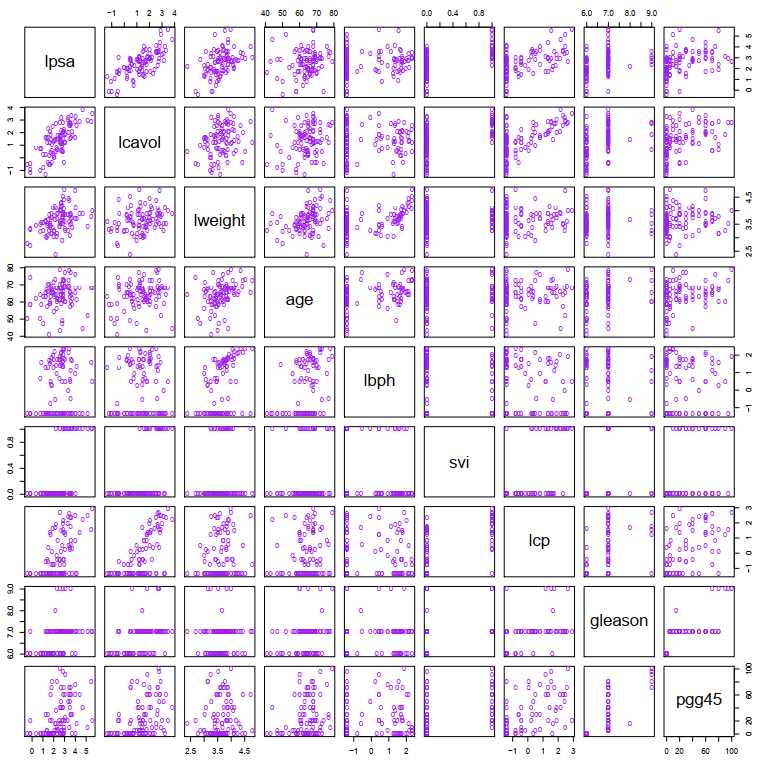

In [86]:
# Referenced Figure 1.1
Image("images/scatterplot.png")

### The reconstructed scatterplot

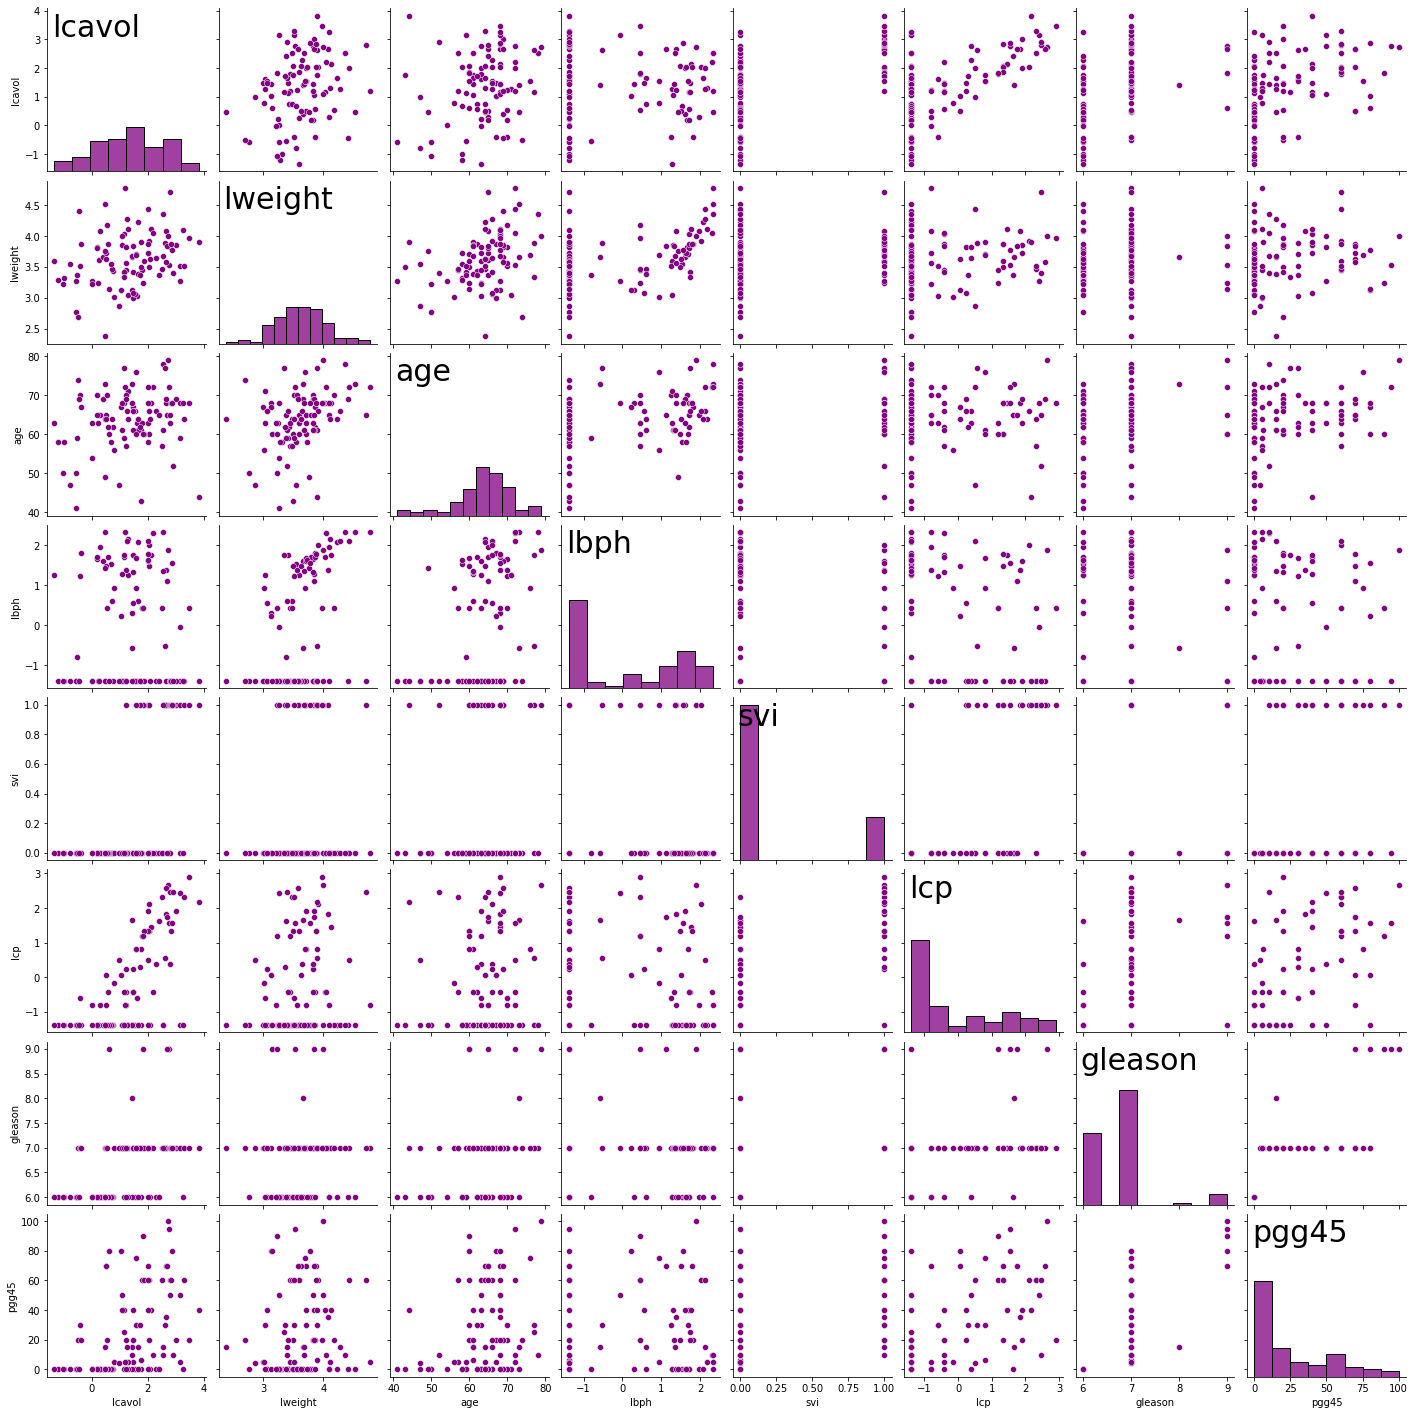

In [87]:
# write solution here
selected_columns = data_table[predictors]

it = iter(list(selected_columns.columns))

def diagfunc(*args, **kws):
    plt.gca().annotate(next(it), xy=(0, 1), xytext=(5,-5), ha="left", va="top", fontsize=30,
                       xycoords=plt.gca().transAxes, textcoords="offset points")

sns.pairplot(selected_columns, diag_kind="hist", plot_kws ={"color":"purple"}, diag_kws ={"color":"purple"}).map_diag(diagfunc)

### 1 b)
Center  and standardize all predictors to have mean zero and unit sample variance

In [88]:
# write solution here

# center all predictors to mean zero
data_table[predictors] = data_table[predictors] - data_table[predictors].mean()

# standardize all predictors to unit sample variance
data_table[predictors] = data_table[predictors] / data_table[predictors].std()

print("Mean of the predictors:\n")
print(data_table[predictors].mean())
print("\nStandard deviation of the predictors:\n")
print(data_table[predictors].std())

Mean of the predictors:

lcavol     3.433679e-17
lweight    6.947478e-16
age        3.960177e-16
lbph      -1.917138e-17
svi        4.807151e-17
lcp        7.325183e-17
gleason    2.060208e-17
pgg45      1.630998e-17
dtype: float64

Standard deviation of the predictors:

lcavol     1.0
lweight    1.0
age        1.0
lbph       1.0
svi        1.0
lcp        1.0
gleason    1.0
pgg45      1.0
dtype: float64


## 1 c) 
Split data into the training and test sets, according to the labels in the last column in _prostate.txt_.

In [89]:
# write solution here

# Split data into the training and testting dataframes, according to the train column
data_train = data_table[data_table['train'] == 'T'].drop('train', axis=1)
data_test = data_table[data_table['train'] == 'F'].drop('train', axis=1)

print("Training dataframe\n")
print(data_train.head())

print("\nTesting dataframe\n")
print(data_test.head())

Training dataframe

   Unnamed: 0    lcavol   lweight       age      lbph       svi       lcp  \
0           1 -1.637356 -2.006212 -1.862426 -1.024706 -0.522941 -0.863171   
1           2 -1.988980 -0.722009 -0.787896 -1.024706 -0.522941 -0.863171   
2           3 -1.578819 -2.188784  1.361163 -1.024706 -0.522941 -0.863171   
3           4 -2.166917 -0.807994 -0.787896 -1.024706 -0.522941 -0.863171   
4           5 -0.507874 -0.458834 -0.250631 -1.024706 -0.522941 -0.863171   

    gleason     pgg45      lpsa  
0 -1.042157 -0.864467 -0.430783  
1 -1.042157 -0.864467 -0.162519  
2  0.342627 -0.155348 -0.162519  
3 -1.042157 -0.864467 -0.162519  
4 -1.042157 -0.864467  0.371564  

Testing dataframe

    Unnamed: 0    lcavol   lweight       age      lbph       svi       lcp  \
6            7 -0.519967 -0.362793  0.018001  0.354858 -0.522941 -0.863171   
8            9 -1.804254 -0.208757 -2.265375 -1.024706 -0.522941 -0.863171   
9           10 -0.956085 -0.897266 -0.116315 -1.024706 -0.5

### 1 d)
* Fit a LS linear regression (with intercept) on the training set.  Report the estimated regression coefficients
* Plot the residuals versus observation number. 

Hint: you should get exactly the same results as given in Table 3.2, page 50, of Hastie et al., (2009) and shown below: 

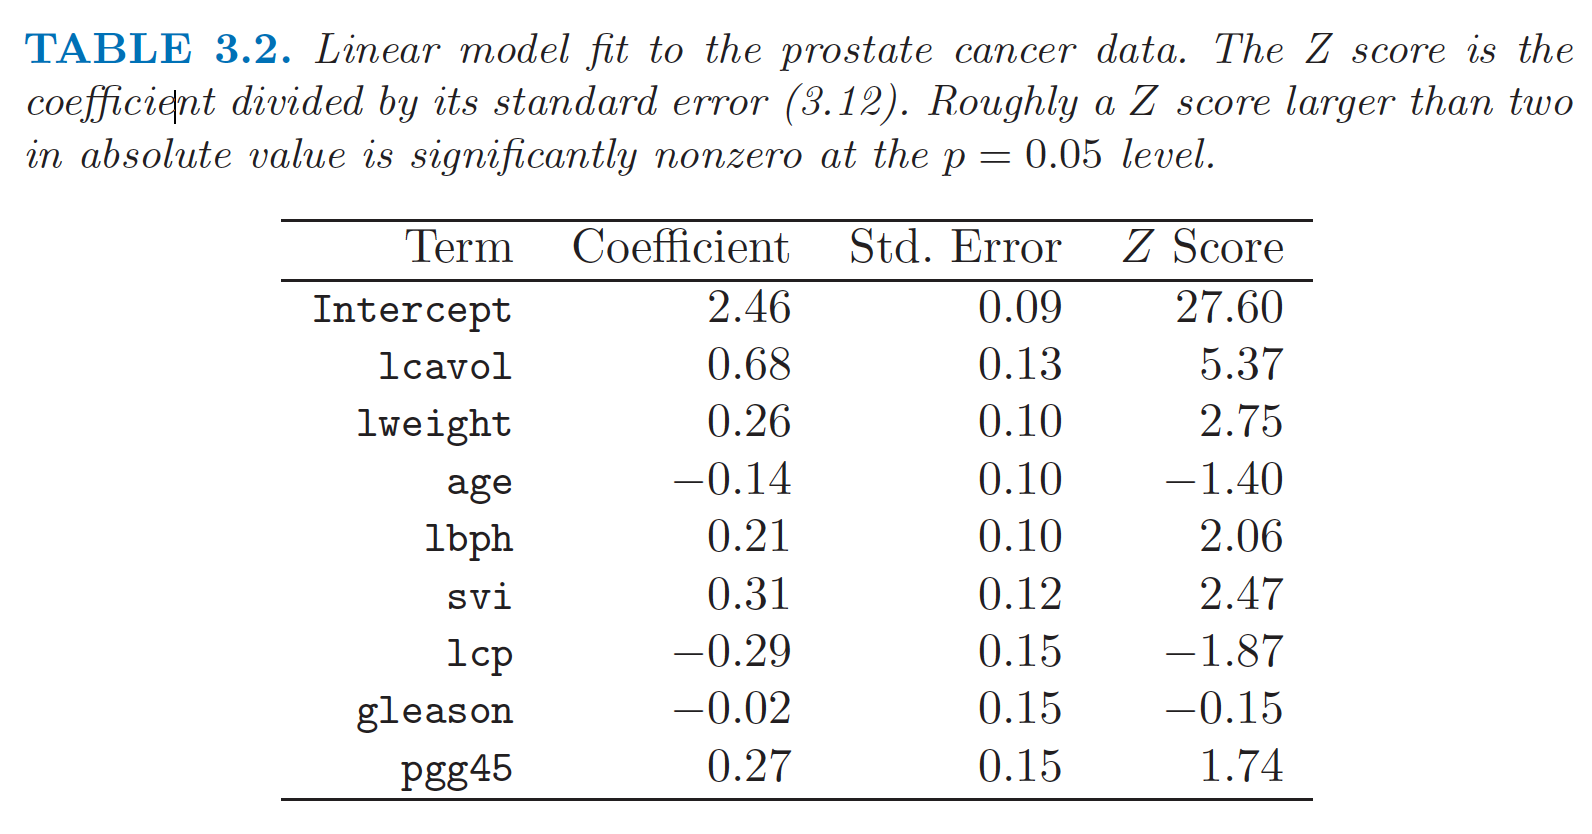

In [90]:
# <img style="width:600px" src="ESLII_table3dot2.png">
Image("images/ESLII_table3dot2.png", width=600)

The estimated coefficients are: 
        Term  Coefficient  Std.Error    Z Score
0  Intercept     2.464933   0.083100  29.662258
1     lcavol     0.679528   0.117818   5.767632
2    lweight     0.263053   0.088974   2.956519
3        age    -0.141465   0.094291  -1.500308
4       lbph     0.210147   0.095106   2.209601
5        svi     0.305201   0.115000   2.653929
6        lcp    -0.288493   0.143776  -2.006538
7    gleason    -0.021305   0.135140  -0.157651
8      pgg45     0.266956   0.142924   1.867812

Plot the residuals versus observation number


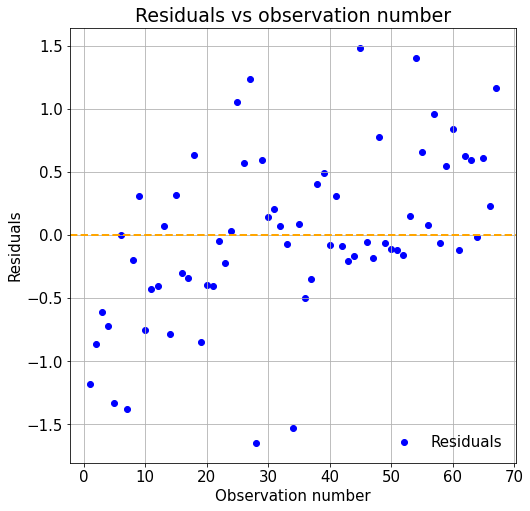

In [110]:
X_train = data_train[predictors].to_numpy()
y_train = data_train["lpsa"].to_numpy()
reg = LM.LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
residuals = y_train - y_pred

coefficients = []
coefficients.append(reg.intercept_)
coefficients.extend(reg.coef_)
terms = predictors[:]
terms.insert(0, "Intercept")


intercept_list = np.concatenate((np.ones((len(y_train), 1)), X_train), axis=1)
#intercept_list = np.concatenate((X_train, np.ones((len(y_train), 1))), axis=1)
MSE = np.mean((y_train - y_pred)**2)
SE = np.sqrt(np.diag(MSE * np.linalg.inv(intercept_list.T @ intercept_list)))

Z_Score = coefficients/SE
#print(intercept_list)
df = pd.DataFrame({'Term': terms, 'Coefficient': coefficients, 'Std.Error':SE,"Z Score":Z_Score})

print("The estimated coefficients are: ")
print(df)

print("\nPlot the residuals versus observation number")
size = 15
observation_number = range(1,len(y_train) + 1)
plt.title(f"Residuals vs observation number", size=size + 4)
plt.scatter(observation_number, residuals, label = "Residuals", color="blue")
plt.axhline(y=0, color='orange', lw=2, linestyle="--")
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
#plt.ylim([0, 0.5])
#plt.xlim([0, 200])
plt.xlabel("Observation number", size=size)
plt.ylabel("Residuals", size=size)
plt.legend(loc=4, frameon=False, fontsize=size)
plt.grid()

### 1 e)
Compute the prediction error (PE) on the test set, where PE is defined as 
$$ PE = \frac{1}{N_{test}} \sum_{i \in I_{test}} (y_i - \hat y_i)^2.$$
where  $ I_{test}$ denotes the indices in the test set.  

In [114]:
# write solution here 
X_test = data_test[predictors].to_numpy()
y_test = data_test["lpsa"].to_numpy()

y_pred = reg.predict(X_test)

print("The prediction error on the test set is:")
PE = np.mean((y_test - y_pred) ** 2)
print(PE)

The prediction error on the test set is:
0.5212740055076004


### 1 f)
* Compute and report the correlation matrix of predictors variables in the training set.
* Identify the largest correlation between the predictors and report it in the form: <br>
<code>max correlation (3 decimal accuracy) is  XXX  between predictors  XXX and  XXX.</code>
<br>

**Hint:** you should get **exactly the same values** as in Table 3.1 of Hastie et al (2017, 12th printing, p. 50) and shown below:

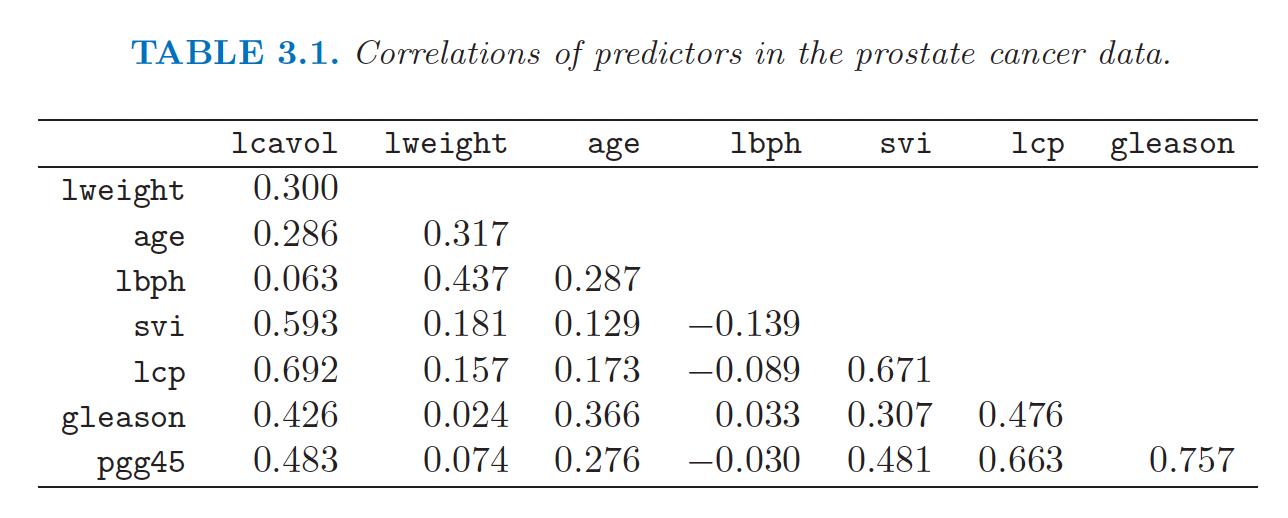

In [138]:
# <img style="width:600px" src="ESLII_table3dot1.png">
Image("images/ESLII_table3dot1.png", width=600)

In [135]:
# write solution here
print("The correlation matrix is")
correlation_matrix = data_train[predictors].corr()
print(correlation_matrix.round(3))

top = correlation_matrix.stack().nlargest(9, keep="last")
top_idx = [(idx[0], idx[1]) for idx in top.index]

print("\nMaximum correlation")
print(top[-1:])

print("\nMax correlation (3 decimal accuracy) is 0.757 between predictors gleason and pgg45")

The correlation matrix is
         lcavol  lweight    age   lbph    svi    lcp  gleason  pgg45
lcavol    1.000    0.300  0.286  0.063  0.593  0.692    0.426  0.483
lweight   0.300    1.000  0.317  0.437  0.181  0.157    0.024  0.074
age       0.286    0.317  1.000  0.287  0.129  0.173    0.366  0.276
lbph      0.063    0.437  0.287  1.000 -0.139 -0.089    0.033 -0.030
svi       0.593    0.181  0.129 -0.139  1.000  0.671    0.307  0.481
lcp       0.692    0.157  0.173 -0.089  0.671  1.000    0.476  0.663
gleason   0.426    0.024  0.366  0.033  0.307  0.476    1.000  0.757
pgg45     0.483    0.074  0.276 -0.030  0.481  0.663    0.757  1.000

Maximum correlation
pgg45  gleason    0.757056
dtype: float64

Max correlation (3 decimal accuracy) is 0.757 between predictors gleason and pgg45


<hr/>

## Question 2: Cyclic Coordinate Descent (CCD) for lasso and elastic net
Read lecture notes discussing the cyclic coordinate descent algorithm (Esa's lecture notes) for lasso and elastic net. <br>

### 2 a) 
Implement the basic CCD Elastic Net (EN) algorithm (<code>ccden</code>) (see *Algorithm 6.1*) by yourself by writing a function named <code>ccden</code> below.  Recall that this algorithm assumes that the predictors are standardized.

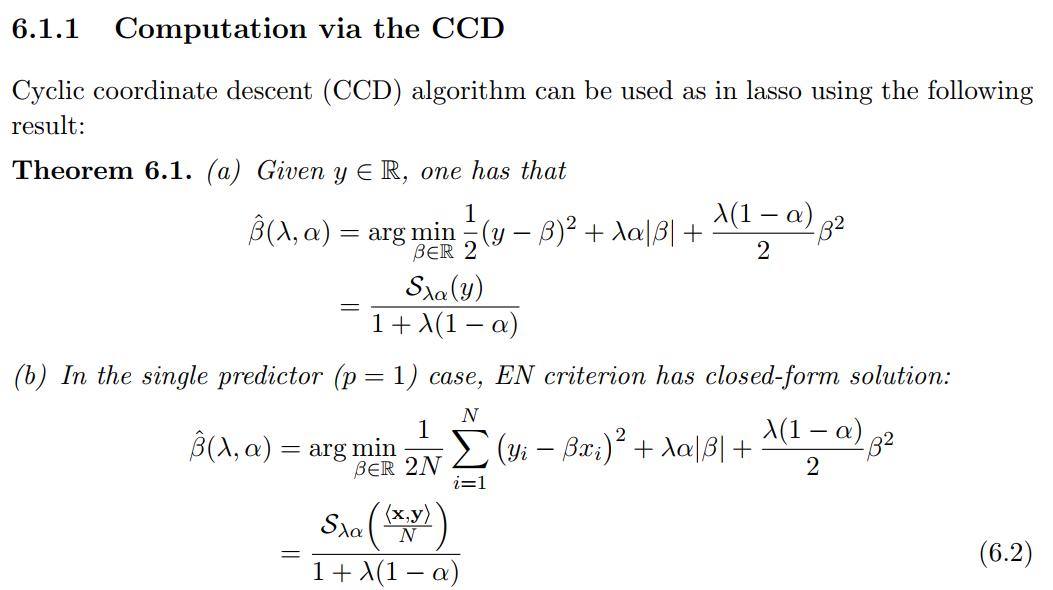

In [142]:
Image("images/611.png", width=600)

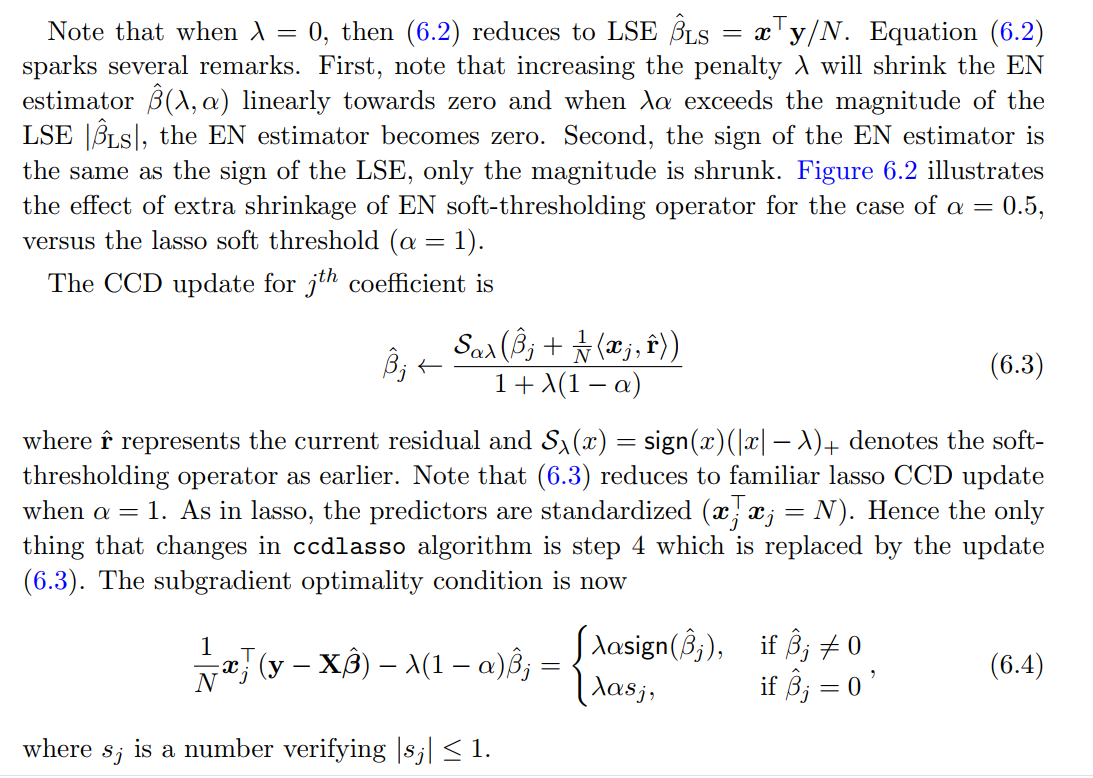

In [143]:
Image("images/612.png", width=600)

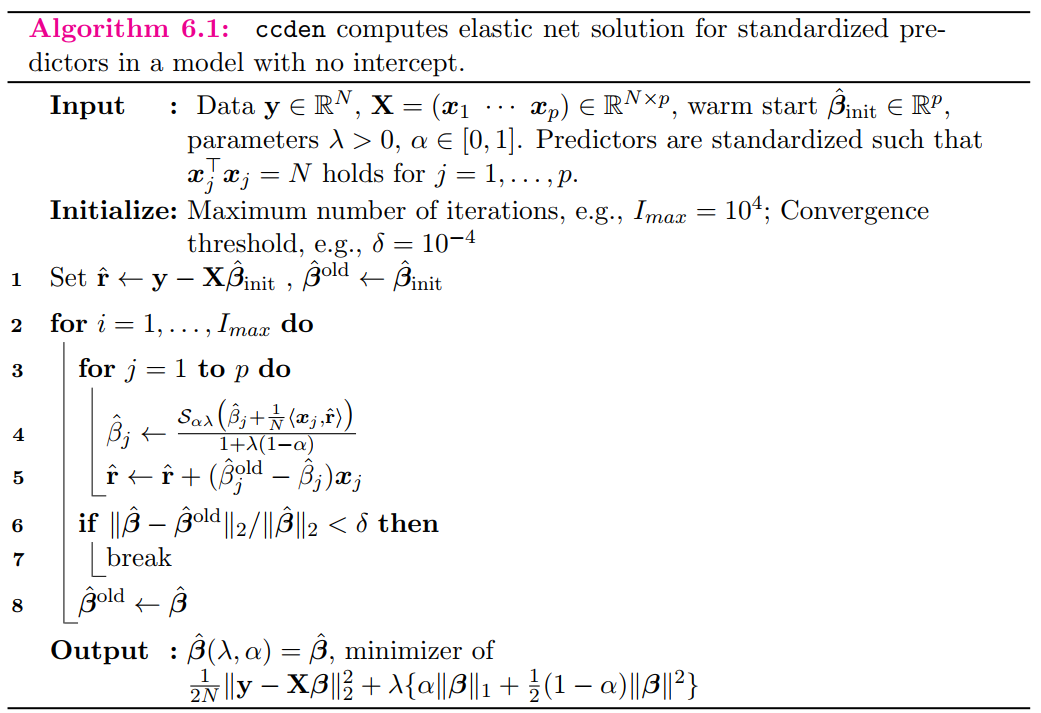

In [141]:
Image("images/ccden.png", width=600)

In [ ]:
def ccden(y, X, beta_init, Lambda, alpha=1.0, delta=1e-4, max_iter=10000):
    rhat = y - np.dot(X, b_init)
    beta_old = beta_init.copy()
    # beta is the vector of regression coefficients
    beta_hat = None
    N, p = X.shape() # Number of datapoints and number of predictors
    for _ in range(max_iter):
        for _ in range(1,p+1):
            beta_hat = 


    return beta_hat

### 2 b) 
But did my code work? Let's check this out.  So your <code>ccden</code> function has produced you an estimate  that minimizes $\frac{1}{2N} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|_2^2 + \lambda \alpha \| \boldsymbol{\beta}\|_1 + \frac 1 2 \lambda (1- \alpha)\|\boldsymbol{\beta} \|_2^2 $.  Recall the subgradient optimality conditions:  $\hat{\boldsymbol{\beta}}$ is the solution for EN optimization problem with penalty parameter if and only if equation (6.4) in Lecture notes holds.

Perform these steps:
1. First center both the response and predictor variables of the prostate cancer training data set you created in 1(c). 
2. Then standardize the predictors. 
3. Give this training data as inputs to <code>ccden</code> function to find the solution $\hat{\boldsymbol{\beta}}(\lambda,\alpha)$  with a penalty parameter value $\lambda=0.3$ and $\alpha=1$ (lasso) and $\alpha=0.9$. The initial value of iteration <code>beta_init</code> should be a vector of zeros.
4. Report the solutions 
5. Verify that  the subgradient optimality condition holds for your solutions.   <br>

**Note**: Essentially, items 1 and 2 perform Steps 1 and 2 of Algorithm 5.1  of Esa's lecture notes.  

In [145]:
lam = 0.3 # This is the penalty for lasso
al = 0.9 # This is the EN penalty parameter

In [ ]:
# step 1 and 2: center and standardize

In [ ]:
# step 3: compute solutions 

In [ ]:
# step 4: report the solutions

In [ ]:
# step 5: verify that subgradient equations hold:

**Note**: You can verify that your code works by checking that  it returns the same value as the following code: 

In [146]:
# y0 and X0 are here the centered / standardized data from 2b)
regLasso0 = LM.Lasso(fit_intercept=False,alpha=lam).fit(X0, y0)
regEN0 = LM.ElasticNet(fit_intercept=False,alpha=lam,l1_ratio=al).fit(X0, y0)
beta_las_star = regLasso0.coef_
beta_en_star = regEN0.coef_
pd.DataFrame(data=(beta_las_star, beta_en_star))

NameError: name 'X0' is not defined

### 2c) 
Then transform the obtained estimates to original scale and compute the intercept, i.e., apply steps 4 and 5 of *Algorithm 5.1*. Report the obtained values of regression coefficents  $\hat{\boldsymbol{\beta}}(\lambda,\alpha)$ and intercept $\hat{\beta}_0(\lambda,\alpha)$ when $(\lambda,\alpha) =(0.3,1)$  and $(\lambda,\alpha)= (0,3,0.9)$. Note that former ($\alpha=1$) yields the lasso solution for the original training data $\mathbf{y}$ and $\mathbf{X}$. Compare the found lasso and EN solution with the LSE solution you computed in question 1d). 

In [ ]:
# solution comes here 

***

## Question 3: FISTA for lasso
### 3a)
Implement FISTA for the lasso problem (see Lecture notes by prof. Vorobyov, pp. 33)  by yourself by writing a function named <code>fistalasso</code>. 

In [ ]:
# def fistalasso  ... 


### 3 b) 
Use the same data set as in question 2b). Show the convergence graphs (as in Assignment 1) for both FISTA and CCD and compare. 
Use the value <code>beta_las_star</code> (obtained in Note of question 2b)  as the true optimum $\boldsymbol{\beta}^*$ of the lasso objective function.   

In [ ]:
# compute the values

In [ ]:
# show convergerence graph 

***
## Question 4: Alternating Direction Method of Multipliers for lasso
### 4 a)
Implement Alternating Direction Method of Multipliers (ADMM) for the lasso problem (see Lecture notes by prof. Vorobyov,  pp. 34) by yourself by writing a function named <code>admmlasso</code>.  Use $\rho=1$ in the ADMM algorithm.  

In [ ]:
# def admmlasso ...

### 4b)
Show the convergence graph of ADMM implementation and compare it to that of FISTA and CCD from the previous problems.

In [ ]:
# compute the values

In [ ]:
# show convergerence graph 